## Content Page

- [Data Cleaning](#Data-Cleaning)
- [Encoding Meaningful Values](#Encoding-Meaningful-Values)
    - [Numerals for Gender and Maritalstatus](#Numerals-for-Gender-and-Maritalstatus)
    - [Create "age_cat" Column for Generation Z and Generation X with Numerals](#Create-"age_cat"-Column-for-Generation-Z-and-Generation-X-with-Numerals)
    
    
    
- [Project Objectives](#Project-Objectives)
- [Data Preparation](#Data-Preparation)
- [Visualisations - in story sequence](#Visualisations---in-story-sequence)
    - [Stacked Horizontal Bar Chart - number of purchases by gender and product](#Stacked-Horizontal-Bar-Chart---number-of-purchases-by-gender-and-product)
    - [Dual Axis Chart - Stacked Bar Chart & Line Chart - number of sales by branch and product](#Dual-Axis-Chart---Stacked-Bar-Chart-&-Line-Chart---number-of-sales-by-branch-and-product)
    - [Bar Chart - total sales by branch](#Bar-Chart---total-sales-by-branch)
    - [Stacked Bar Chart - Generation X vs Generation Z](#Stacked-Bar-Chart---Generation-X-vs-Generation-Z)
    - [Violin Plot modified with a Swarm Plot - Income vs Branch](#Violin-Plot-modified-with-a-Swarm-Plot---Income-vs-Branch)
    - [Box Plot - Distribution of Income vs Product](#Box-Plot---Distribution-of-Income-vs-Product)
    - [Box Plot - Distribution Income of all Genders](#Box-Plot---Distribution-Income-of-all-Genders)
    - [Violin Plot - Female Only Income vs Branch](#Violin-Plot---Female-Only-Income-vs-Branch)
    - [Multi-Scatter Plots- Correlation of Customers Fitness vs Many Variables](#Multi-Scatter-Plots--Correlation-of-Customers-Fitness-vs-Many-Variables)
    - [Bar Chart - Count of purchases vs Genders (Fit only)](#Bar-Chart---Count-of-purchases-vs-Genders-(Fit-only))
    - [Heat Map - Correlation of all vs all](#Heat-Map---Correlation-of-all-vs-all)
- [Conclusion](#Conclusion)
- [Reflection](#Reflection)
- [Dash Board](#Dash-Board)

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

missing_values = ["n/a", "na", "N.A.", "--", ".", " "] # add a list of possible values to be NaN
df = pd.read_csv("cardio_good_fitness.csv", na_values = missing_values)
dfc = df.copy()
dfc.head(10)

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18.0,Male,14.0,Single,NaN,4.0,29562.0,112.0
1,TM195,East,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
2,TM195,West,19.0,Female,14.0,P,4.0,3.0,30699.0,66.0
3,TM195,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TM195,West,19.0,Male,12.0,S,NaN,3.0,32973.0,85.0
5,TM195,North,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0
6,TM195,East,20.0,Female,14.0,Partnered,3.0,3.0,32973.0,66.0
7,TM195,East,21.0,Female,14.0,Partnered,3.0,3.0,35247.0,75.0
8,TM195,West,21.0,Male,13.0,Single,NaN,3.0,32973.0,85.0
9,TM195,West,21.0,Male,15.0,Single,5.0,4.0,35247.0,141.0


In [2]:
# to minimise careless errors of programming common in " " spaces or Capital letters
# and to facilitate the use of certain function calls requiring lowerCase

dfc.columns = [x.lower().replace(" ", "_") for x in dfc.columns]

In [3]:
# find any NaN values, understanding the dataframe
print(dfc.shape)
print("INFO :")
print(dfc.info())
print()
print("DESCRIPTION OF DATAFRAME :")
print(dfc.describe())
print()
print(f"NaN VALUES : \n{dfc.isnull().sum()}")

(183, 10)
INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product        183 non-null    object 
 1   branch         183 non-null    object 
 2   age            174 non-null    float64
 3   gender         180 non-null    object 
 4   education      180 non-null    float64
 5   maritalstatus  180 non-null    object 
 6   usage          172 non-null    float64
 7   fitness        180 non-null    float64
 8   income         180 non-null    float64
 9   miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 14.4+ KB
None

DESCRIPTION OF DATAFRAME :
              age   education       usage     fitness         income  \
count  174.000000  180.000000  172.000000  180.000000     180.000000   
mean    28.781609   15.572222    3.476744    3.311111   53719.577778   
std      7.062766    1.617055    1.105296    0.9

## Encoding Meaningful Values


### Numerals for Gender and Maritalstatus
 gender: 0= nan, 1 = Male, 2 = Female
 maritalstatus: 0 = nan, 1 = Single, 2= Partnered

In [4]:
# convert all NaN values in numerical columns to median values
dfc.fillna(dfc.median(), inplace= True)

# if unable to convert to median, then to appropriate String values
dfc["gender"].fillna("No Gender", inplace = True)
dfc["maritalstatus"].replace(to_replace = "S", value = "Single", inplace= True )
dfc["maritalstatus"].replace(to_replace = "P", value = "Partnered", inplace = True)

# map numerical values to give meaning to String values
maritalMap = {"Single": 1, "Partnered": 2}
genderMap = {"No Gender": 0, "Male": 1, "Female": 2}
dfc.replace(maritalMap, inplace = True)
dfc.replace(genderMap, inplace = True)
dfc["maritalstatus"].replace(np.nan, 0, inplace = True) # covert NaN to value 0

# convert all floating types to int types
dfc = dfc.astype({"age":'int', "maritalstatus": "int", "education":'int', "usage": "int", "fitness": "int", "income": "int", "miles": "int"}) 

# check for any NaN or Null values still existing
print("Count of NaN or Null values if any: ")
print(dfc.isnull().sum())
print()
print(dfc.info())

Count of NaN or Null values if any: 
product          0
branch           0
age              0
gender           0
education        0
maritalstatus    0
usage            0
fitness          0
income           0
miles            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product        183 non-null    object
 1   branch         183 non-null    object
 2   age            183 non-null    int64 
 3   gender         183 non-null    int64 
 4   education      183 non-null    int64 
 5   maritalstatus  183 non-null    int64 
 6   usage          183 non-null    int64 
 7   fitness        183 non-null    int64 
 8   income         183 non-null    int64 
 9   miles          183 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 14.4+ KB
None


/var/folders/j3/lkzmyhfd4jlbsjyzx2lm6d840000gn/T/ipykernel_24703/561124930.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc.fillna(dfc.median(), inplace= True)


### Create "age_cat" Column for Generation Z and Generation X with Numerals
 age_cat: 0 = generation_Z, 1 = unimportant, 2 = generation_X

In [5]:
# creation of "age_cat" to split the generation type of buyers
dfc["age_cat"] = np.where((dfc["age"] >=18 ) & (dfc["age"] <30), 0, dfc["age"]) # generation_Z
dfc["age_cat"] = np.where((dfc["age"] >=30 ) & (dfc["age"] <40), 1, dfc["age_cat"]) # unimportant generation
dfc["age_cat"] = np.where(dfc["age"] >=40, 2, dfc["age_cat"]) # generation_X
dfc = dfc.reindex(['product','branch','age','age_cat','gender', 'education','maritalstatus','usage','fitness','income','miles']
                , axis=1)
# cleaned dataframe
print(dfc.info())
display(dfc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product        183 non-null    object
 1   branch         183 non-null    object
 2   age            183 non-null    int64 
 3   age_cat        183 non-null    int64 
 4   gender         183 non-null    int64 
 5   education      183 non-null    int64 
 6   maritalstatus  183 non-null    int64 
 7   usage          183 non-null    int64 
 8   fitness        183 non-null    int64 
 9   income         183 non-null    int64 
 10  miles          183 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 15.9+ KB
None


,product,branch,age,age_cat,gender,education,maritalstatus,usage,fitness,income,miles
0,TM195,West,18,0,1,14,1,3,4,29562,112
1,TM195,East,19,0,1,15,1,2,3,31836,75
2,TM195,West,19,0,2,14,2,4,3,30699,66
3,TM195,South,26,0,0,16,0,3,3,50596,94
4,TM195,West,19,0,1,12,1,3,3,32973,85
...,...,...,...,...,...,...,...,...,...,...,...
178,TM798,East,40,2,1,21,1,6,5,83416,200
179,TM798,West,42,2,1,18,1,5,4,89641,200
180,TM798,East,45,2,1,16,1,5,5,90886,160
181,TM798,North,47,2,1,18,2,4,5,104581,120


Generation X is encoded as 0, and Generation Z is encoded as 2.

The idea was to create a column that compares two distinct generations i.e. Generation_X and Generation_Z, the "unimportant generation" encoded as 1 acts as the intermediary to separate the above mentioned generation by sufficient number of years for more reliable data.

## Project Objectives

The fitness industry market has been growing at an outstanding rate. Attention to our customers was promptly identified by management to first understand customers ever changing characteristics and tastes for their products. We will undertake data driven analysis and create visualisations to help you, the management, to understand your customers.

To understand how customers characteristics affect their buying behaviour, we start by asking a myriad of questions regardless of relevance because as a whole, may open up new doors of discovery. We hope these questions will provide insights to your customer patterns of behaviour and open new avenues of profit generation.

Questions that may help us understand our customers:

* Which branch and product types do higher income customers are biased to ?
* In general, which products do each genders like better ?
* Which products are Fitness individuals attracted to ?
* Correlation of base line fitness or income to the rest of variables ?
* What are the purchasing attitudes of generation X and Z to our products ? 
* Which product sells best for each branch ? 
* Which suburb has the highest number of unfit or fit ?

## Data Preparation

The data was generally clean. We first turn the columns into lower-case and eliminated any possibility of special characters that may hinder the ease of our analysis.

We identified all null values in numerical columns and then converted those values to their respective column  median value.

Next, we transformed string values in columns "genders" and "maritalstatus" into meaningful numbers, which may simplify calculations and formulation of understanding of these variables. Any NaN values in these columns were replaced by 0 value.

As much as possible, given we have only a small sample of 183, kept all data for analysis.

We have also created a new column called "age_cat", where the values in column "age" were categorized to their respective generation types i.e. generation Z and generation X, in numerical form. A middle range generation identified as "1" acts to provide sufficient years to split Generation X and Z apart for greater data reliability.

## Visualisations - in story sequence

### Stacked Horizontal Bar Chart - number of purchases by gender and product
Since we are in the business of selling physical products that involves emotions, a stacked horizontal Bar chart will provide us our first, quick and simple to understand but informative comparison between our customers (genders) and their purchasing attitude to our products.

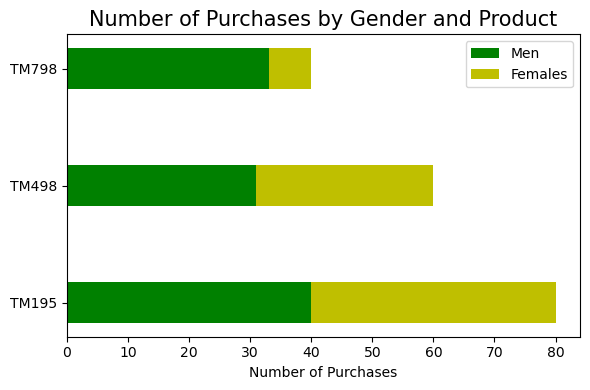

In [6]:
xLabels = np.unique(dfc["product"])
width = 0.35

## Method 1
# males = [dfc[(dfc["product"] == product ) & (dfc["gender"] == 1)]["product"].count() for product in xLabels]
# females = [dfc[(dfc["product"] == product ) & (dfc["gender"] == 2)]["product"].count() for product in xLabels]

## Method 2
maledf= dfc[dfc["gender"] == 1]
males = maledf.groupby("product")["gender"].count()

femaledf = dfc[dfc["gender"] ==2]
females = femaledf.groupby("product")["gender"].count()

fig, ax = plt.subplots(figsize = (6,4))
ax.barh(xLabels, males, width, label = "Men", color = 'g')
ax.barh(xLabels, females, width, left= males, label='Females', color = 'y')
# # ax.bar(x_labels, boy_means, width, bottom=Total_means, label='Boys', color = 'k')

ax.set_xlabel("Number of Purchases")
ax.set_title("Number of Purchases by Gender and Product", fontsize =15)
ax.legend()
fig.tight_layout()
plt.show()

The chart points out a distinct preference for TM195. Who as in what characteristics are buying TM195 and why are they doing so ?. Answering this question may increase our bottomline.

The ratio of females and males preference to most of our products are of equal measure. There is clear females disdain for the product TM798.

The deep negative female attitude drastically pulls down the number of TM798 sold which affects not only our sales, but the dead weight of unsold goods affects cost and hence profits. The pertinent question now asks why are females not buying TM798 ?

The next chart will provide us an in depth look into discovering more about the attitudes towards TM195 and TM798 and answering the mentioned questions. 

### Dual Axis Chart - Stacked Bar Chart & Line Chart - number of sales by branch and product
This dual axis chart incorporates the benefits of a stacked bar chart as mentioned, but when coupled with a line chart  where the bars and lines interlink may provide greater visuals and understanding. Here, we plot the stacked bar charts showing the different coloured products purchased vs the branch the product was bought at. The line plot represents only females purchases and allows clear distinction of gender preferences.

/var/folders/j3/lkzmyhfd4jlbsjyzx2lm6d840000gn/T/ipykernel_24703/3901289998.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  ax_f.plot(positions, listfGroup, 'g', label = 'number purchased', color="black")


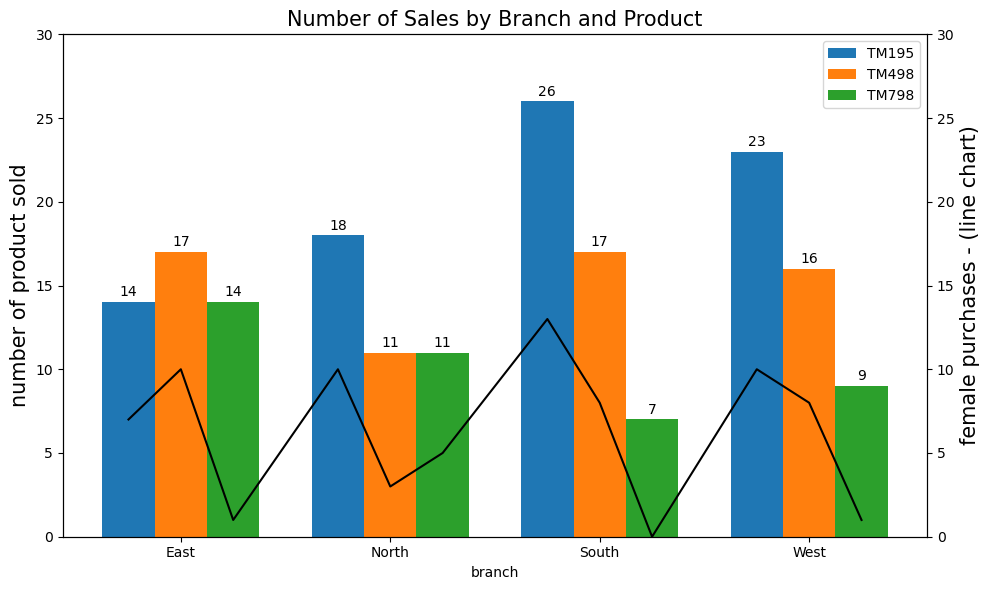

In [7]:
fig, ax1 = plt.subplots(figsize = (10,6))

width= 0.25
products = dfc["product"].unique()
branches =np.unique(dfc["branch"]) # auto sorted by numpy

# determine values of number of sales of each product for each branch   
tm195df = dfc [dfc["product"] == "TM195"]
tm195s = tm195df.groupby("branch")["product"].count()  # Series
# print(tm195s, type(tm195s))

tm498df = dfc[dfc["product"] == "TM498"]
tm498s = tm498df.groupby("branch")["product"].count()  # Series

tm798df = dfc[dfc["product"] == "TM798"]
tm798s = tm798df.groupby("branch")["product"].count() # Series
# print(tm798s)

## determine position of x3 bars in each branch
x1 = np.arange(len(branches))
x2 = [pos + width for pos in x1]
x3 = [pos +width for pos in x2]

# plot the bars x3 as a group per branch
bar1 = ax1.bar(x1, tm195s, label = "TM195", width = width)
bar2 = ax1.bar(x2, tm498s, label = "TM498", width = width)
bar3 = ax1.bar(x3, tm798s, label = "TM798", width = width)

# beautify
ax1.set_title("Number of Sales by Branch and Product", fontsize=15)
ax1.set_ylabel("number of product sold", fontsize = 15)
ax1.set_xlabel("branch")
ax1.set_xticks(x1+width)
ax1.set_xticklabels(branches)
ax1.set_ylim(bottom=0, top=30)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
#         print(each)
        height = each.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# # Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
ax1.legend()

### Dual axis line chart
# determine count value of purchases by females for ea branch

fdf = dfc[dfc["gender"] == 2]
s_fgroup = fdf.groupby(["branch", "product"])["product"].count() # Series
# print(s_fgroup, type(s_fgroup))

# insert "0" for zero sales by females in branch "south" to match x,y position
listfGroup= list(s_fgroup.copy())
listfGroup[8:8] = [0]
# print(listfGroup)

np_x1, np_x2, np_x3 = (np.array(x1),np.array(x2) ,np.array(x3))
np_all = np.column_stack([np_x1, np_x2, np_x3])
positions = [x for item in np_all for x in item]

# Plot line women purchases (right)
ax_f = ax1.twinx()
ax_f.plot(positions, listfGroup, 'g', label = 'number purchased', color="black")
ax_f.set_ylim(bottom = 0, top = 30)
ax_f.set_ylabel('female purchases - (line chart)', fontsize = 15)
        
 # misc
fig.tight_layout()
plt.show()

The branch our customers buy the products from is assumed to also represent the area the customer lives in.

Customers except branch East, have overwhelming preference for TM195 over other products.

The chart findings uncovers that females across the board have a poor preference for TM798.
However, take note that in North branch, displays the best attitude of females for TM798 relative to other branches or product line. In fact, the female preference difference for TM798 in North vs others is significant.

Also note the interesting feature that north branch females preference towards TM798 is equal to its males.

So that begs the question as to why are females in the North showing a much greater attitude to TM798 than the rest and why are the males not showing similar negativity to TM798 across all branches ?

So far, in summary, we have discovered,
-- TM195 is a top seller with equal preference between genders across all branches. 
-- TM798 except North branch, is disliked by females of all branches.
-- TM798 is not prejudiced by Males in all branches

To answer our questions, we have to discover more about our branches too.

### Bar Chart - total sales by branch
The previous dual axis bar and line chart do not tell us clearly as to how the branches are performing in terms of number of sales. Since we do not have a dollar amount, the number of product sold will reflect that performance.

Text(0.5, 0, 'Branch')

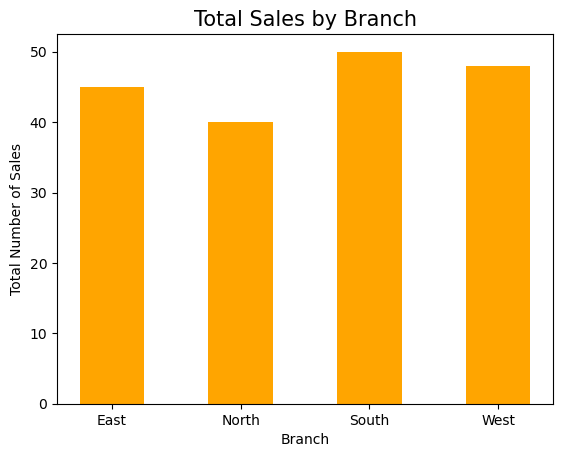

In [8]:
# determine Number of Sales per Branch
width = 0.5
sales = dfc.groupby("branch")['branch'].count()
# print(sales, type(sales))

x_axis = np.unique(dfc["branch"])
# print(x_axis)

fig, ax2 = plt.subplots()
ax2.bar(x_axis, sales, width, label = x_axis, color = "orange"  )

ax2.set_title("Total Sales by Branch" ,fontsize=15)
ax2.set_ylabel("Total Number of Sales")
ax2.set_xlabel("Branch")

The south branch is our top performer when the number of sales is the measuring tool for performance.
The bar chart affirms that South branch gets most of its sales from TM195. We should start investigating the demographics of the customers living in those areas to uncover more insights into TM195 and TM798.

### Stacked Bar Chart - Generation X vs Generation Z
The all useful and simple stacked bar chart still plots product type vs number of sales, however the stacked bar chart now differentiates between the generation type - Generation X and Generation Z.

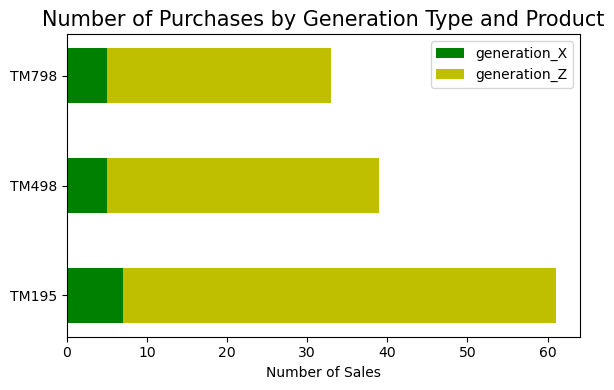

In [9]:
products = np.unique(dfc["product"])

# generation Z
df_gz= dfc[dfc["age_cat"] == 0]
s_gz = df_gz.groupby("product")["product"].count()

# generation X
df_gx = dfc[dfc["age_cat"] ==2]
s_gx = df_gx.groupby("product")["product"].count()

fig, ax = plt.subplots(figsize = (6,4))

ax.barh(products, s_gx, width, label = "generation_X", color = 'g')
ax.barh(products, s_gz, width, left= s_gx, label='generation_Z', color = 'y')
# # ax.bar(x_labels, boy_means, width, bottom=Total_means, label='Boys', color = 'k')

ax.set_xlabel("Number of Sales")
ax.set_title("Number of Purchases by Generation Type and Product", fontsize =15)
ax.legend()
fig.tight_layout()
plt.show()

Findings uncovers that generation Z overwhelmingly purchased threadmills.
Now begs the question, as to why the poor attitude of generation X to fitness products such as treadmills ?

Generation X should be a clear target market for our company as they are assumed to have greater purchasing power as well as poorer health over Generation Z.

Speaking about purchasing power aka income, we then need a powerful graph that reflects that near omnipotent variable, income against various other variables. We start off with the Violin Plot.

### Violin Plot modified with a Swarm Plot - Income vs Branch
The violin plot enchanced with a Swarm Plot is a clear upgrade from a Box Plot. This graph was specifically selected to give a powerful overview of the distribution of our customers income across all branches while also dividing them into percentiles, showing the spread of the income as well as highlighting outliers that will skew the results.

/var/folders/j3/lkzmyhfd4jlbsjyzx2lm6d840000gn/T/ipykernel_24703/675022575.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x= "branch", y='income', data=dfc,


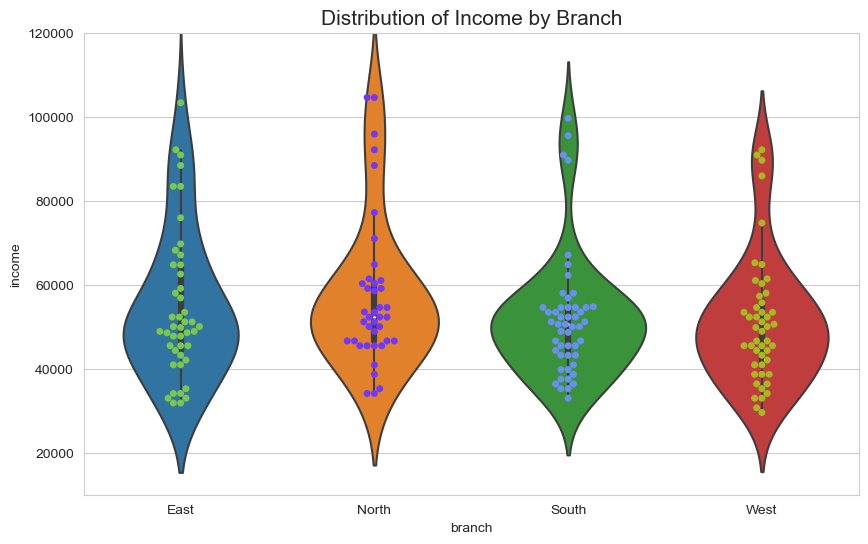

In [20]:
# Set figure size
plt.figure(figsize=(10,6))
# display(dfc)
dfc.sort_values(by=["branch"], inplace = True)
# display(dfc)

# Set theme
sns.set_style("whitegrid")
pkmn_type_colors = ['#78C850',
                    '#7038F8', 
                    '#6890F0',
                    '#A8B820' 
                   ] 
# Violin plot
sns.violinplot(x="branch", y="income", data=dfc)
sns.swarmplot(x= "branch", y='income', data=dfc, 
            palette=pkmn_type_colors  )

plt.ylim(bottom=10000, top=120000)
plt.title("Distribution of Income by Branch", fontsize = 15)
# Display the plot
plt.show()

Take note again, branch is assumed to refer also the customers who dwell there, and are an excellent reflection of these customers' income.

 * East and North branch being more affluent suburbs with broader and smoother violin necks as the distribution of income goes higher. But East having little outliers gives greater confidence that East are a more reliable spread. That explains the pretty much even purchase of all three products by the East.
 * South has the highest number of sales with TM195 as mentioned previously, but also deemed a lesser affluent suburb with many distribution around the median as evidenced by the broad violin belly at the 50 percentile range and slimmer neck indicating lesser numbers of higher income. 
 
At this juncture of our investigation, I suspect higher income and particularly males are buyers of TM798. TM798 is likely the priciest product (evidence of product price was not included in the study). Whereas, lesser income of all genders trend towards TM195, likely our cheapest product.

My suspicions, however needs to be verified further, and I have decided to simplify the distribution with our next two following graphs, the Box Plots.

### Box Plot - Distribution of Income vs Product

Box plot like their Violin cousins provide meaningful insights through their percentile distributions. It is simple and its median line clearly indicated.

Text(0.5, 1.0, 'Distribution of Income by Product')

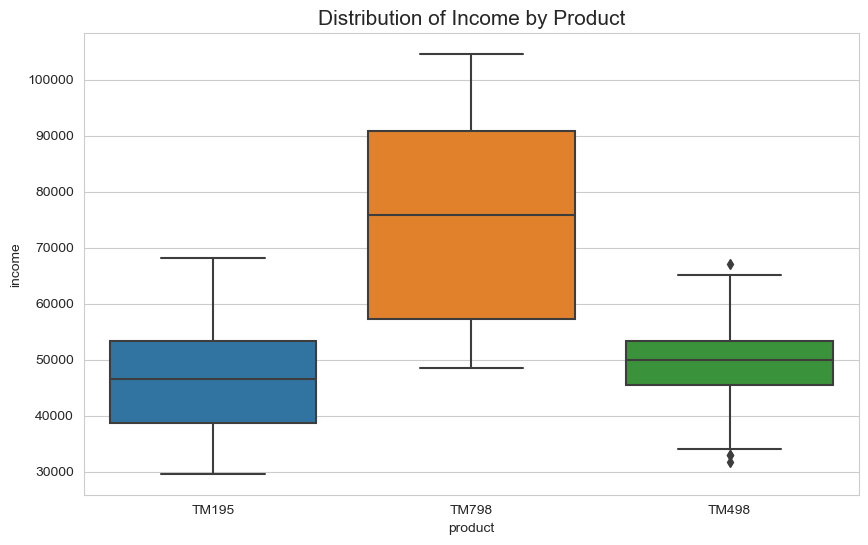

In [11]:
plt.figure(figsize=(10,6))

sns.set_style("whitegrid")
  
sns.boxplot(x = "product", y = "income", data = dfc )

plt.title("Distribution of Income by Product", fontsize = 15)

Clearly, we can tell the magic of a distribution graph at work.

High median income of TM798 and a box sitting above the rest of the product range, overhelmingly indicates a relatively higher number of higher income earners purchasing TM798.

Lower income with indicated by a low median and a box of lower top to bottom reflects a liking for TM195.

The assumption we take is higher income customers have the capacity and tendency to purchase higher-end costlier products in our line up.

TM798 conclusively is the priciest product. The demographics trending to this product are males, likely of generation Z and purchased by people of higher income. But it still does not for certain tell me why females are not liking TM798. 

Is income therefore affordability the main reason for females purchasing decisions ?. Let us look into the following box plot which is a reflection of income vs genders.

### Box Plot - Distribution Income of all Genders
Again a simple distribution box plot will be sufficient.

Text(0.5, 1.0, 'Distribution of Income by Genders')

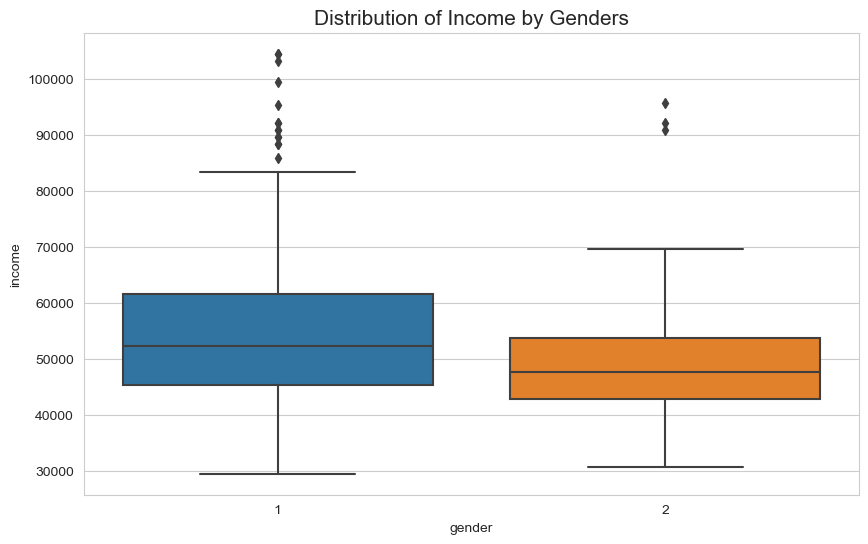

In [12]:
dfcm = dfc.copy()
for index, row in dfcm.iterrows():
    if row.gender == 0:
#         print("got in", index)      
        dfcm.drop(labels = index, axis = 0, inplace = True)
                  
plt.figure(figsize=(10,6))

sns.set_style("whitegrid")  
sns.boxplot(x = "gender", y = "income", data = dfcm )

plt.title("Distribution of Income by Genders", fontsize = 15)

Conclusively, males income are generally higher than females as reflected by a higher median income and evidence suggests males' 50 percentile of the data having greater depth than females.

Moreover, males have many greater income in the top end than females as evidenced by the percentile over 75 percent that may contribute to the overwhelming purchase of our assumed priciest product TM798. Do note also a high amount of outliers which may not be errors but actual very high income earners.

Let us look into the distribution of female income only vs Branch in the finale to answer the question of female disdain for TM798.

### Violin Plot - Female Only Income vs Branch

I chose the more comprehensive Violin Plot to make my final conclusion

(10000.0, 120000.0)

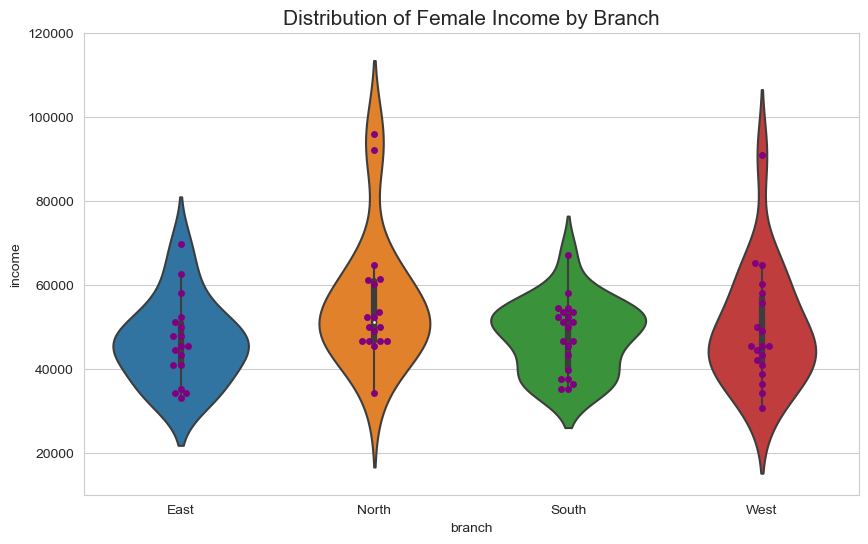

In [13]:
dfcm_female = dfcm[dfcm["gender"] == 2]
# display(dfcm_female)
sns.set_style("whitegrid")
plt.figure(figsize =(10,6))

sns.violinplot(x = "branch", y = "income", data = dfcm_female)
sns.swarmplot (x = "branch", y = "income", color = "purple", data = dfcm_female)

plt.title("Distribution of Female Income by Branch", fontsize = 15)
plt.ylim(bottom=10000, top=120000)

With similar analysis to the prior violin graphs.
I deduced early that TM798 is generally unaffordable to females. The Violin Plot indicated many females were not having higher income in the upper end, and even lacking in the supposedly more affluent suburb of the East as evidence of a shorter neck/head and bigger belly.

What is contributing to TM798 purchase by females are actually outliers e.g. North, i.e. females with unusually very high incomes are buying them along with proportionally higher number of higher and very high income males !!!.

The inverse also reflects the trend for TM195, our most affordable range.

And the least mentioned TM498 is simply the middle range product.

Now we have pretty much cleared doubts of the demographics of our products. We shall continue to investigate further for greater insights when the next key criterior, fitness is examined. We shall start by looking for correlations towards fitness.

### Multi-Scatter Plots- Correlation of Customers Fitness vs Many Variables

A dash board of multi scatter plots have been decided to give a birds eye view of correlations of fitness vs a variety of useful variables deemed to provide the most information. A trend line to give better visuals of correlation.

Variables of Usage, Miles, Education, Income were chosen to uncover correlations.

(0.0, 6.0)

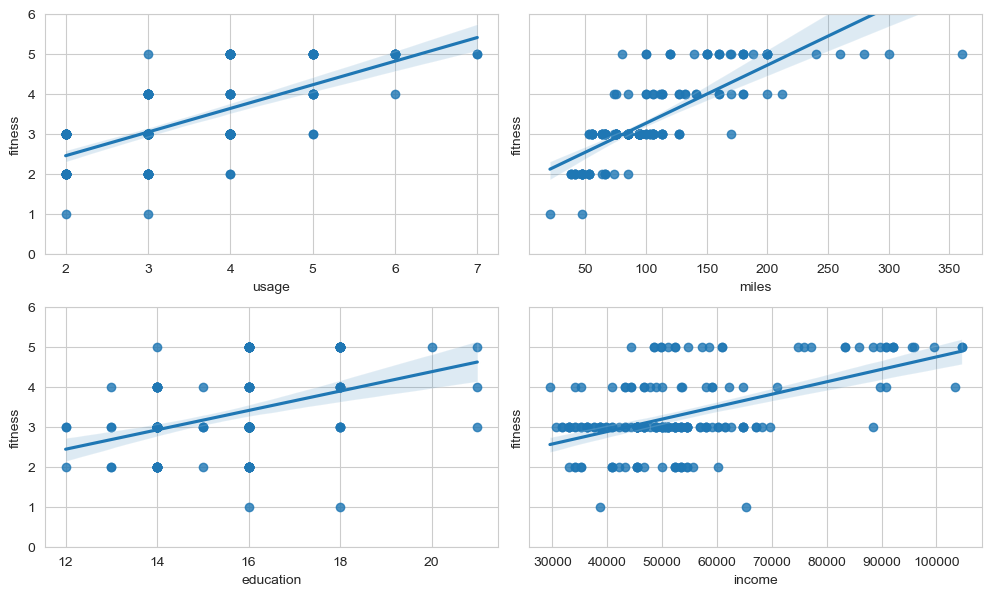

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), sharey = True)
ax = ax.ravel()

x_axis_values = ["usage", "miles", "education", "income"]

for i in range(len(x_axis_values)):
    sns.regplot(x=x_axis_values[i], y='fitness', data=dfc, fit_reg=True, ax=ax[i])
plt.tight_layout(pad=1)
plt.ylim(bottom=0, top =6)

The scatter plots show a positive correlation of fitness to all variables. In other words, people who expects to use the treadmill often are using it longer each time, have a higher education or higher income and also tend to be fit !!

The reason for this deduction is, since the base "fitness" was applied to all competing variables and they all came out positively correlated, thus it be said that the competing variables are also positively correlated to each other.

For example, a person with higher numbers of years in education generally have higher income, a greater usage of treadmill in both of length and depth. Remember, these charts speak of correlation and not causation.

### Bar Chart - Count of purchases vs Genders (Fit only)
A simple bar chart again, accentuates the diffences between FIT only genders.

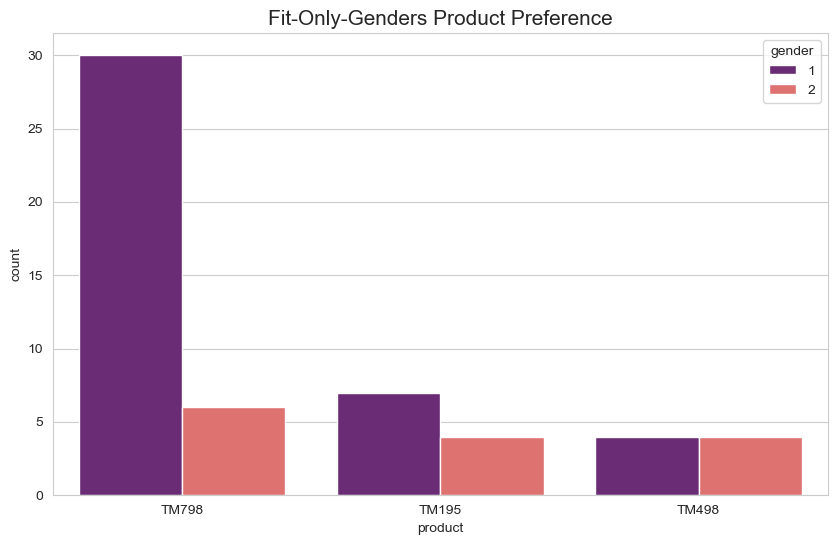

In [15]:
# display(dfc)
dfc_cfit = dfc.copy()

# drop UNFIT people
for index, row in dfc_cfit.iterrows():
    if row.fitness < 4:
        dfc_cfit.drop(index, inplace = True)
# display(dfc_cfit)

plt.figure(figsize = (10,6))

sns.countplot(x = 'product', hue = 'gender', data = dfc_cfit, palette = 'magma')
plt.title("Fit-Only-Genders Product Preference", fontsize = 15)
plt.show()

It appears that amongst fit people, overwhelmingly fit males have preference for product TM798. Fit females also show a higher preference for TM798, but that preference is not markedly obvious. That tells me that affordability is a clear criterion in female choice as they are lacking the capacity to purchase.

Compare this discovery to measuring all fitness levels where the general population prefer product TM195.

### Heat Map - Correlation of all vs all
With limited time and resource, we have to conclude the demographic and behavioural analysis of our customers by introducing the heat map. This powerful chart shows the correlation to all variables vs one another. 

/var/folders/j3/lkzmyhfd4jlbsjyzx2lm6d840000gn/T/ipykernel_24703/1915776786.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_stats.corr()


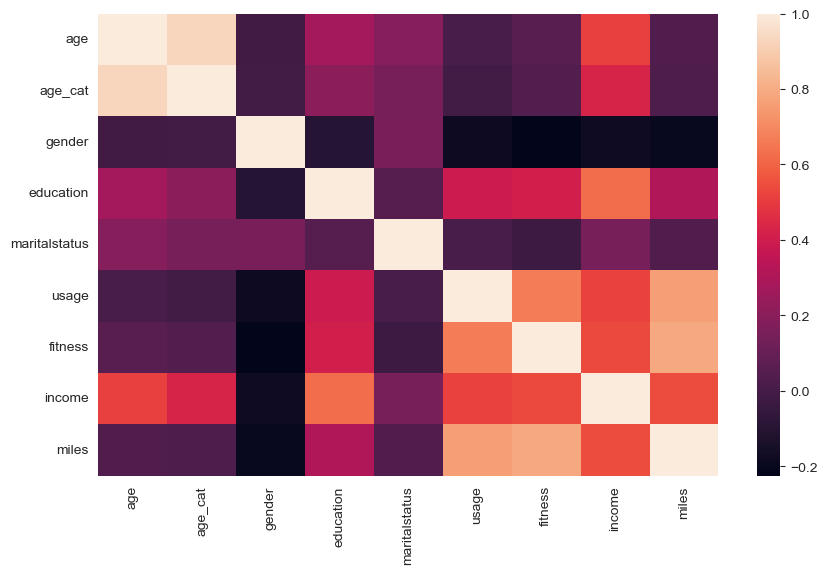

In [16]:
# display(dfc)
plt.figure(figsize=(10,6))

dfc.columns

df_stats = dfc[dfc.columns]

corr = df_stats.corr()
# # Create heatmap
sns.heatmap(corr)

# # Display the plot
plt.show()

It can be too much to swallow visually as correlation is measured by colours of various intensity. 

But we have already uncovered a large chunk of mystery in our study, and the heat map has verified the accuracy of already mentioned gender behaviours towards our products, and the factors affecting those decisions.

## Conclusion

The multi-factorial analysis of our customers was carried out to uncover the multi-faceted preference towards our products. We have discovered that in general:

TM798:
* It can be suggested that TM798 appeal to fit people, more so when they have high income.
* In particular, males of high-income in Generation Z and have high perceived fitness are biased to this product.
* Females generally show a strong disdain for TM798, a likely reason is a lack of affordability as typically high income females buy them.

TM195:
* This is the most affordable product, appeals to both genders of most characteristics. However, fit males disapproves TM195 strongly and overwhelmingly seek TM798.
* South Branch sells the most of this product, where income congregates tightly in the lower end. Strong disdain for TM798 by females in this branch given their lower income.

TM498:
* The analysis discovers that this product is the middle priced product.
* Companies typically embrace having a cheap and an expensive product to lure buyers towards their middle priced range via clever marketing or value features, it was disappointing to discover that TM195, instead of TM498, is a better seller in terms of numbers.
* We appeal to management to investigate into this phenomena and improve on TM498 features and marketing.

There is a huge market for income packed generation X. It is disappointing to see that we are lacking of generation X into our products purchase. Marketing efforts and resource should pour into attracting this particular niche market in order to boost our bottomline.

## Reflection

Completing this project motivates me further to look into the art of creating beautiful visuals. Time constraints was impending my research further, but I know over time, and with reference to the many resource available, I would simply get better.

## Dash Board

/var/folders/j3/lkzmyhfd4jlbsjyzx2lm6d840000gn/T/ipykernel_24703/2627565208.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  ax_f.plot(positions, listfGroup, 'g', label = 'number purchased', color="black")


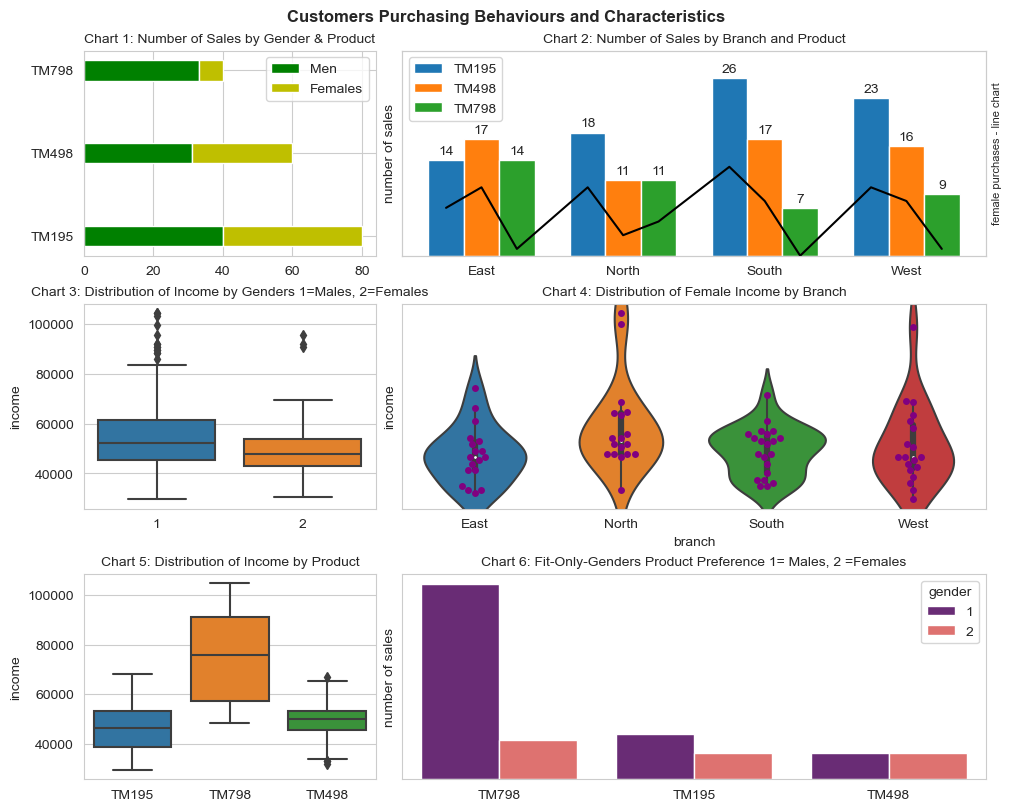

In [17]:
## set figure and gris spec position
fig = plt.figure(figsize = (10,8), constrained_layout = True)                 
gs = fig.add_gridspec(nrows = 3, ncols =3)

### ax1 dual axis chart ###
ax1 = fig.add_subplot(gs[0,1:])

# stacked bar charts x 3
width= 0.25

# plot the bars x3 as a group per branch
bar1 = ax1.bar(x1, tm195s, label = "TM195", width = width)
bar2 = ax1.bar(x2, tm498s, label = "TM498", width = width)
bar3 = ax1.bar(x3, tm798s, label = "TM798", width = width)

# beautify
ax1.set_title("Chart 2: Number of Sales by Branch and Product", fontsize=10)
ax1.set_ylabel("number of sales", fontsize = 10)

# ax1.set_xlabel("Branch")
ax1.set_xticks(x1+width)
ax1.set_xticklabels(branches, fontsize = 10)
ax1.set_ylim(bottom=0, top=30)

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
ax1.legend()

# line Chart
np_x1, np_x2, np_x3 = (np.array(x1),np.array(x2) ,np.array(x3))
np_all = np.column_stack([np_x1, np_x2, np_x3])
positions = [x for item in np_all for x in item]

# Plot line women purchases (right)
ax_f = ax1.twinx()
ax_f.plot(positions, listfGroup, 'g', label = 'number purchased', color="black")
ax_f.set_ylim(bottom = 0, top = 30)
ax_f.set_ylabel('female purchases - line chart', fontsize = 8)
ax_f.set_yticks([])

ax1.grid(False)
ax1.set_yticks([])

### ax2 bar chart stacked horizontal ###
ax2 = fig.add_subplot(gs[0,0])
ax2.barh(xLabels, males, width, label = "Men", color = 'g')
ax2.barh(xLabels, females, width, left= males, label='Females', color = 'y')

# ax2.set_xlabel("Number of Purchases")
ax2.set_title("Chart 1: Number of Sales by Gender & Product", fontsize = 10)
ax2.legend()

### ax3 box plot ###
ax3 = fig.add_subplot(gs[1,0])
sns.set_style("whitegrid")  
sns.boxplot(x = "gender", y = "income", data = dfcm, ax = ax3)
plt.title("Chart 3: Distribution of Income by Genders 1=Males, 2=Females", fontsize = 10)
ax3.set(xlabel=None)

### ax4 box plot ###
ax4 = fig.add_subplot(gs[2,0])
sns.set_style("whitegrid")
sns.boxplot(x = "product", y = "income", data = dfc, ax = ax4)
plt.title("Chart 5: Distribution of Income by Product", fontsize = 10)
ax4.set(xlabel=None)

### ax5 violin chart ###
ax5= fig.add_subplot(gs[1, 1:])
sns.set_style("whitegrid")
sns.violinplot(x = "branch", y = "income", data = dfcm_female, ax = ax5)
sns.swarmplot (x = "branch", y = "income", color = "purple", data = dfcm_female, ax = ax5)
plt.xticks(fontsize = 10)

ax5.set_ylabel("income")
plt.title("Chart 4: Distribution of Female Income by Branch", fontsize = 10)
# plt.ylim(bottom=10000, top=120000)
ax5.set_yticks([])

### ax6 bar chart ###
ax6 = fig.add_subplot(gs[2,1:])
sns.countplot(x = 'product', hue = 'gender', data = dfc_cfit, palette = 'magma', ax = ax6)
plt.title("Chart 6: Fit-Only-Genders Product Preference 1= Males, 2 =Females", fontsize = 10)
ax6.set(xlabel=None)
ax6.set_yticks ([])
ax6.set_ylabel("number of sales", fontsize=10)

## set tight and show
plt.suptitle("Customers Purchasing Behaviours and Characteristics", fontweight="bold")
plt.show()